In [411]:
import sys
sys.path.append("C:\\Users\josep\Documents\Anaconda\pkgs")
import help_tools
import wave_tools
import cv2
import h5py
from matplotlib import cm
import radar_tools

In [412]:
import numpy as np
from wave_tools import ConstructWave, surface_core, peak_tracking
from wave_tools import fft_interpolate, fft_interface
from wave_tools import SpectralAnalysis
import matplotlib.pyplot as plt
from help_tools import plotting_interface
from wave_tools import surface_core, fft_interface, dispersionRelation

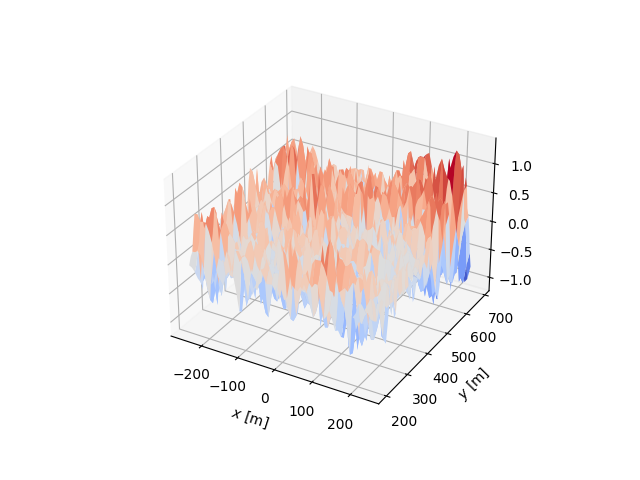

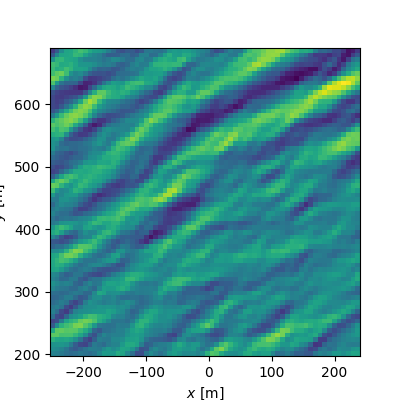

In [413]:
Hs = 2.0
Alpha = 0.023
smax = 70
theta_mean = np.pi/2+30*np.pi/180
gamma = 3.3

dx = 7.5
dy = 7.5
x = np.arange(-250, 245, dx)
y = np.arange(200, 695, dy)

surf2d = ConstructWave.JonswapWave2D(x, y, Hs, Alpha, gamma, theta_mean, smax)
surf2d.plot_3d_as_2d()
surf2d.plot_3d_surface()
plt.show()

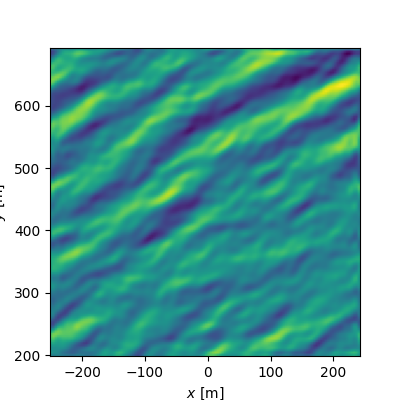

In [415]:
surf2d_interpolated = surf2d.fft_interpolate(2,2)
surf2d_interpolated.plot_3d_as_2d()
plotting_interface.show()

In [416]:
surf2d

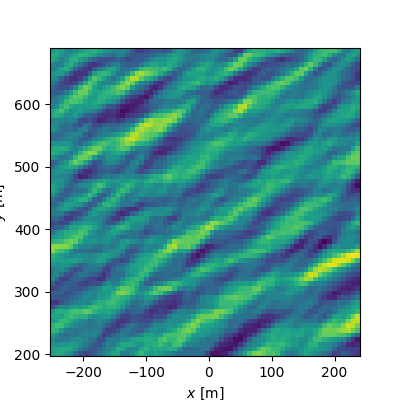

In [417]:
surf2d = ConstructWave.JonswapWave2D(x, y, Hs, Alpha, gamma, theta_mean, smax)
surf2d
surf2d.plot_3d_as_2d()

## Trying my data 

In [418]:
f = h5py.File('shearing_curr_res_7.5_dt_1.0_T_600_U_1.0exp(0.2z)+0.05_psi_30_smax_10_0_surf3d.hdf5', 'r')

In [419]:
x = f.get('x')
y = f.get('y')

In [420]:
x = np.array(x)
y = np.array(y)

In [421]:
surf3d = surface_core.surface_from_file("shearing_curr_res_7.5_dt_1.0_T_600_U_1.0exp(0.2z)+0.05_psi_30_smax_10_0_surf3d.hdf5")

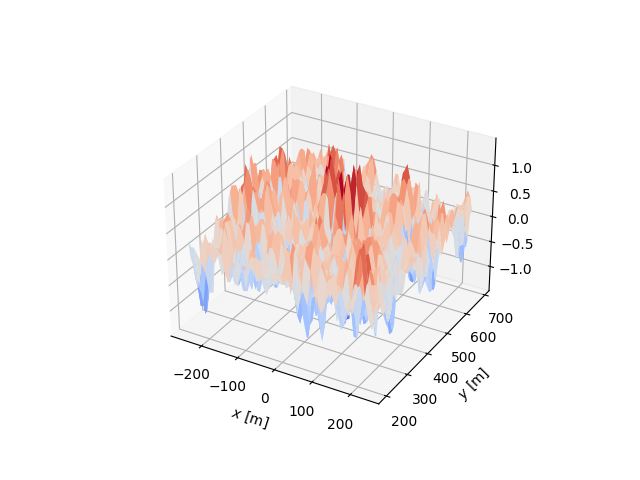

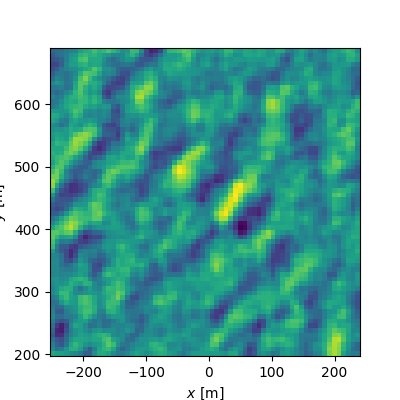

In [422]:
surf3d.plot_3d_as_2d()
surf3d.plot_3d_surface()
plt.show()

In [423]:
k, Uk = surface_core.effective_current_from_file("shearing_curr_res_7.5_dt_1.0_T_600_U_1.0exp(0.2z)+0.05_psi_30_smax_10_0_surf3d.hdf5")

In [424]:
spec3d = surf3d.define_SpectralAnalysis()
spec3d

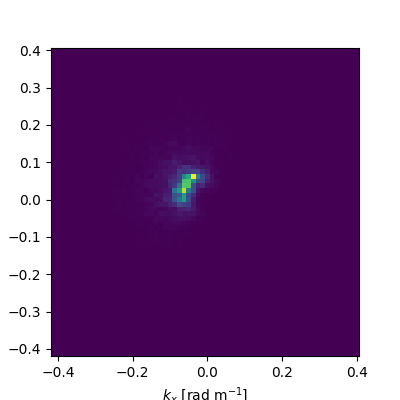

In [425]:
spec3d.plot()

In [426]:
k_limit = 0.4
spec3d_anti_aliased = spec3d.get_anti_aliased_spec3d(k_limit)

In [427]:
spec3d_anti_aliased

Text(0.5, 1.0, 'Anti-aliased plot')

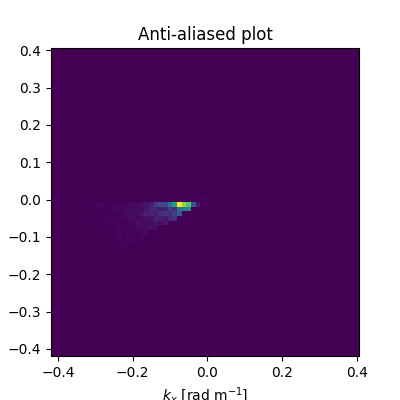

In [428]:
spec3d_anti_aliased.plot()
plt.title("Anti-aliased plot")

In [429]:
kx = spec3d.kx
ky = spec3d.ky 
w = spec3d.w
# Calculates kx, ky and w for the spectral domain 

In [430]:
w.shape
# shape of w is 600 but shape of kx and ky is 66
# do we have to subsample w to get coresspoding values

(600,)

In [434]:
spec3d_anti_aliased.w.shape
# Anti aliased spectrum doubles the amount of times sampled

(1198,)

2 2.0001473227855016 191


Text(0.5, 1.0, 'Spectra Plot at W = 3')

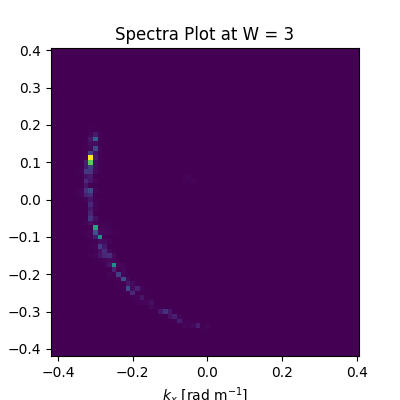

In [435]:
spec3d.plot_w_slice(2)
# Method for 3D, plot kx-ky spectra at a given w

plt.title("Spectra Plot at W = 3")

In [447]:
spec3d.get_peak_dir()

-0.6979021561317582

In [454]:
spec3d.estimate_Ueff_psi(h = 10, Umax = 0.82)

(array([0.80634211, 0.81681409, 0.82728607, 0.83775804, 0.84823002,
        0.85870199, 0.86917397, 0.87964594, 0.89011792, 0.90058989,
        0.91106187, 0.92153385, 0.93200582, 0.9424778 , 0.95294977,
        0.96342175, 0.97389372, 0.9843657 , 0.99483767, 1.00530965,
        1.01578162, 1.0262536 , 1.03672558, 1.04719755, 1.05766953,
        1.0681415 , 1.07861348, 1.08908545, 1.09955743, 1.1100294 ,
        1.12050138, 1.13097336, 1.14144533, 1.15191731, 1.16238928,
        1.17286126, 1.18333323, 1.19380521, 1.20427718, 1.21474916,
        1.22522113, 1.23569311, 1.24616509, 1.25663706, 1.26710904,
        1.27758101, 1.28805299, 1.29852496, 1.30899694, 1.31946891,
        1.32994089, 1.34041287, 1.35088484, 1.36135682, 1.37182879,
        1.38230077, 1.39277274, 1.40324472, 1.41371669, 1.42418867,
        1.43466065, 1.44513262, 1.4556046 , 1.46607657, 1.47654855,
        1.48702052, 1.4974925 , 1.50796447, 1.51843645, 1.52890842,
        1.5393804 , 1.54985238, 1.56032435, 1.57

In [457]:
from wave_tools import shoaling_1d
dx = 0.5
x = np.arange(200, 2200+dx, dx)
g = 9.81
Tp = 10
fp = 1./Tp
gamma  = 3.3
Nf = 100
f_min = 0.001
f_max = 0.4
F = 300000

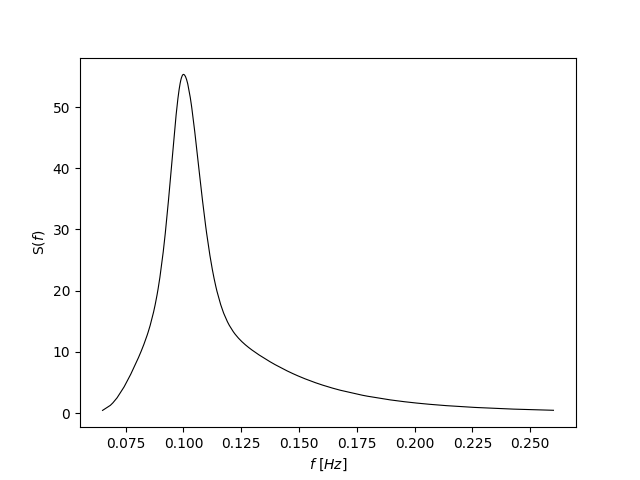

In [458]:
# Create a 1D spectrum and plot it
spec = shoaling_1d.Spectrum(Tp, gamma, F)
spec.plot()
plotting_interface.show()

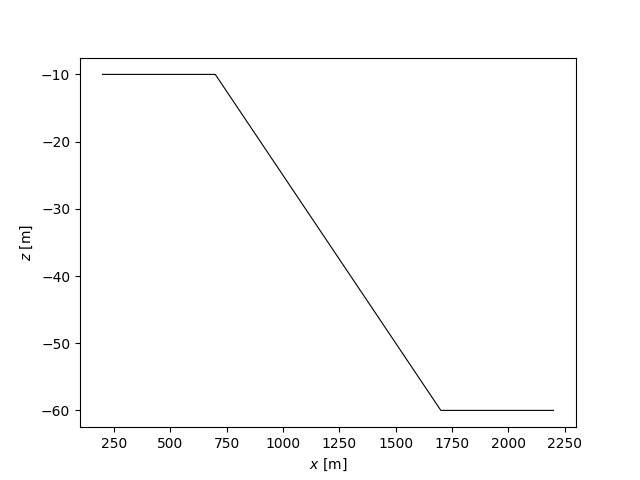

In [459]:
# Define bathymetry
b = shoaling_1d.Bathymetry(x, bathy_filename=None)
b.plot()
plotting_interface.show()

<AxesSubplot:xlabel='$t~\\mathrm{[s]}$', ylabel='$x~\\mathrm{[m]}$'>

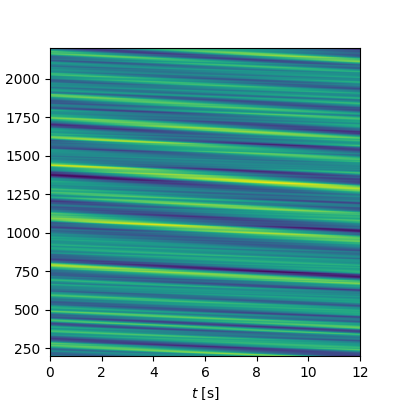

In [460]:
# Create a realization with random phases
realization = shoaling_1d.SpectralRealization(spec, f_min, f_max, Nf, dx)

# Construct wave field from spectrum
Nt = 120
Nx = len(x)
eta = np.zeros((Nt, Nx))
vel = np.zeros((Nt, Nx))
t = np.linspace(0, 12, Nt)

eta = realization.invert(b, t, x)
vel = realization.vel(eta, b,  t, x)
bsurf = surface_core.spacetempSurface('surfprofile', eta, [x, t])
bsurf.plot_3d_as_2d()

In [464]:
Uk = f.get('Uk')

In [465]:
Uk = np.array(Uk)
Uk

array([[0.1062773 , 0.1062773 , 0.1062773 , ..., 0.1062773 , 0.1062773 ,
        0.1062773 ],
       [0.11102711, 0.11102711, 0.11102711, ..., 0.11102711, 0.11102711,
        0.11102711],
       [0.11572868, 0.11572868, 0.11572868, ..., 0.11572868, 0.11572868,
        0.11572868],
       ...,
       [0.8272204 , 0.8272204 , 0.8272204 , ..., 0.8272204 , 0.8272204 ,
        0.8272204 ],
       [0.82746936, 0.82746936, 0.82746936, ..., 0.82746936, 0.82746936,
        0.82746936],
       [0.82771777, 0.82771777, 0.82771777, ..., 0.82771777, 0.82771777,
        0.82771777]])

## Plotting Dispersion Relation

In [466]:
z = f.get('z')

In [467]:
z_list = np.array(z)

In [468]:
U_list = np.array([4,5])

In [469]:
U = f.get('U')

In [470]:
U_list = np.array(U)

## Extract closest estimate for kx ky when W = 2

2 2.0001473227855016 191


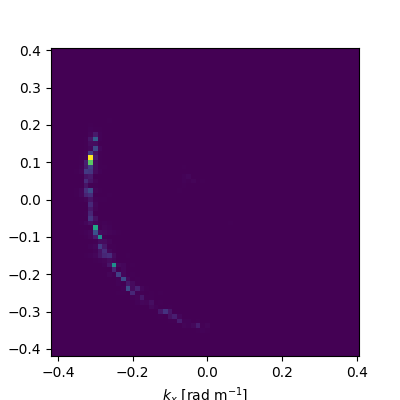

In [471]:
spec3d.plot_w_slice(2)
# Method for 3D, plot kx-ky spectra at a given w

In [472]:
at_w = 2

In [473]:
i = np.argmin(np.abs(spec3d.w[600//2:]-at_w))

In [474]:
thing = spec3d.spectrum()

In [475]:
thing1 = thing[600//2+i,:,:]
thing1.shape

(66, 66)

In [476]:
max_index = np.unravel_index(np.argmax(thing1), thing1.shape)
max_index

(8, 42)

In [477]:
max_kx = spec3d.kx[max_index[0]]
max_ky = spec3d.ky[max_index[1]]

In [478]:
max_kx

-0.3173325912716963

In [479]:
max_ky

0.1142397328578107

## When w = 1.7

1.1 1.0995574287564276 105


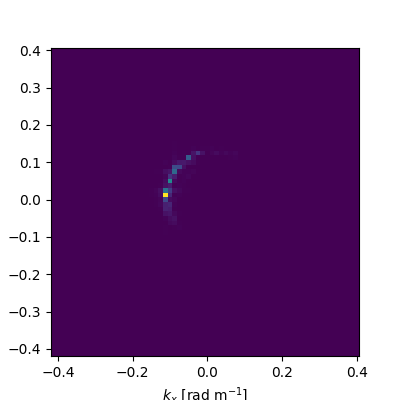

In [499]:
spec3d.plot_w_slice(1.1)
# Method for 3D, plot kx-ky spectra at a given w

In [481]:
at_w = 1.7
i = np.argmin(np.abs(spec3d.w[600//2:]-at_w))

In [482]:
thing = spec3d.spectrum()

In [483]:
thing1 = thing[600//2+i,:,:]
thing1.shape

(66, 66)

In [484]:
max_index = np.unravel_index(np.argmax(thing1), thing1.shape)
max_index

(14, 37)

In [485]:
max_kx = spec3d.kx[max_index[0]]
max_ky = spec3d.ky[max_index[1]]

In [486]:
max_kx

-0.24117276936648915

In [487]:
max_ky

0.050773214603471395

## Try to loop array

In [488]:
%matplotlib widget
# makes plots interactive 

In [535]:
kx_list = []
ky_list = []
# empty kx and ky lists for triplet values

thresh_freq = 1
max_freq = 2
step_size = 0.1
# Input frequencies values 

freqs = np.arange(thresh_freq, max_freq, step_size)

for f in freqs:
    i = np.argmin(np.abs(spec3d.w[600//2:]-f))
    spec = spec3d.spectrum()
    spec_values = spec[600//2 + i,:,:]
    # Gives the spectrum values represented by colour
    
    max_index = np.unravel_index(np.argmax(spec_values), spec_values.shape)
    # Finds the specific index of the maximum value in spec_values
    
    max_kx = spec3d.kx[max_index[0]]
    max_ky = spec3d.ky[max_index[1]]
    # Finds the value of kx and ky corresponding to the maximum spectral density 
    
    kx_list.append(max_kx)
    ky_list.append(max_ky)

In [536]:
kx_list

[-0.08885312555607494,
 -0.11423973285781064,
 -0.10154642920694279,
 -0.1269330365086785,
 -0.16501294746128203,
 -0.19039955476301776,
 -0.2030928584138856,
 -0.24117276936648915,
 -0.2665593766682248,
 -0.2665593766682248]

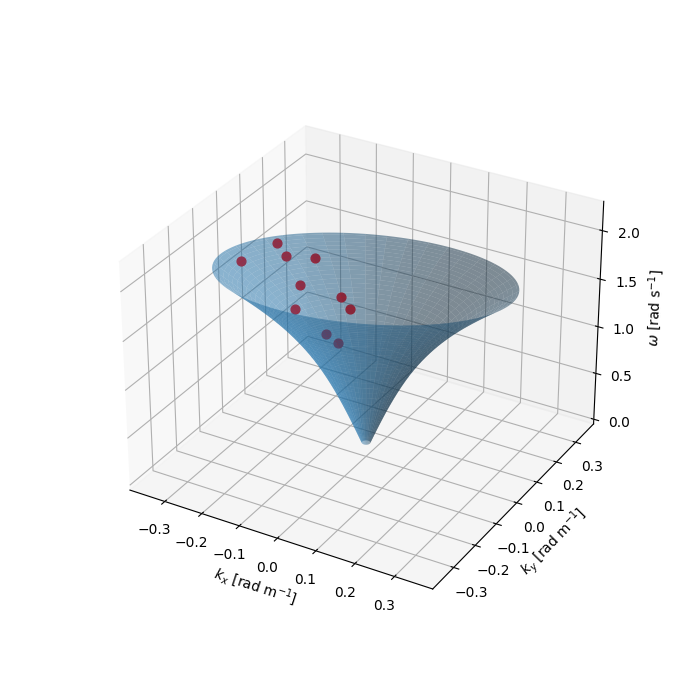

In [490]:
fig = plt.figure(figsize=(7,7))
axes = fig.add_subplot(111, projection='3d')
plotting_interface.plot_disp_shell(axes, h=10, z = z_list, U = U_list, psi = 30)

j = 0
for j in range(0, len(freqs)):
    axes.scatter(kx_list[j], ky_list[j], freqs[j], color='red', s=40)
    
plt.show()

## Making it into a function 

In [837]:
def plot_triplets_vs_disp_surface(thresh_freq, max_freq, step_size, h, z, U, psi):
    freqs = np.arange(thresh_freq, max_freq, step_size)
    
    kx_list = []
    ky_list = []

    for f in freqs:
        i = np.argmin(np.abs(spec3d.w[600//2:]-f))
        spec = spec3d.spectrum()
        spec_values = spec[600//2 + i,:,:]
        # Gives the spectrum values represented by colour
    
        max_index = np.unravel_index(np.argmax(spec_values), spec_values.shape)
        # Finds the specific index of the maximum value in spec_values
    
        max_kx = spec3d.kx[max_index[0]]
        max_ky = spec3d.ky[max_index[1]]
        # Finds the value of kx and ky corresponding to the maximum spectral density 
        
        kx_list.append(max_kx)
        ky_list.append(max_ky)
    
    fig = plt.figure(figsize=(7,7))
    axes = fig.add_subplot(111, projection='3d')
    plotting_interface.plot_disp_shell(axes, h, z, U, psi)

    for j in range(0, len(freqs)):
        axes.scatter(kx_list[j], ky_list[j], freqs[j], color='red', s=40)
    
    plt.show()
    
    return kx_list, ky_list, freqs

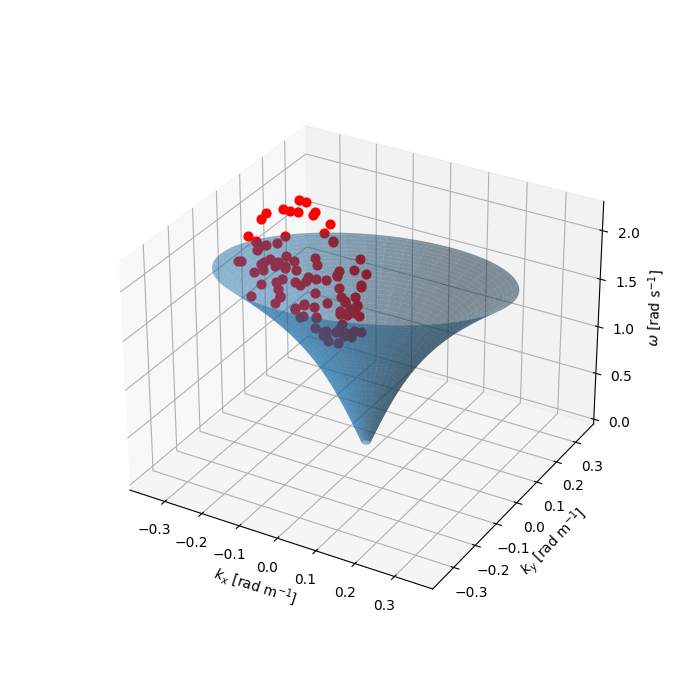

In [838]:
kx_list, ky_list, freqs = plot_triplets_vs_disp_surface(thresh_freq = 1 , max_freq = 2, step_size = 0.01, h = 10, z = z_list, U = U_list, psi = 30)

In [579]:
freqs

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99])

In [580]:
len(kx_list)

100

## Plotting 2 circles on the dispersion relation 

1.7 1.6964600329384876 162


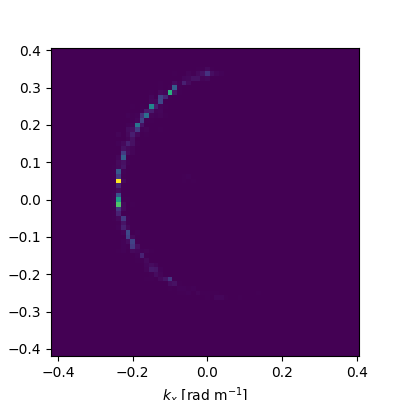

In [659]:
spec3d.plot_w_slice(1.7)
# Method for 3D, plot kx-ky spectra at a given w

In [643]:
at_w = 1.7
i = np.argmin(np.abs(spec3d.w[600//2:]-at_w))

In [644]:
thing = spec3d.spectrum()

In [645]:
thing1 = thing[600//2+i,:,:]
thing1.shape

(66, 66)

In [646]:
thing1[14,37]

5.506496758783733

In [647]:
spec3d.ky

array([-0.41887902, -0.40618572, -0.39349241, -0.38079911, -0.36810581,
       -0.3554125 , -0.3427192 , -0.33002589, -0.31733259, -0.30463929,
       -0.29194598, -0.27925268, -0.26655938, -0.25386607, -0.24117277,
       -0.22847947, -0.21578616, -0.20309286, -0.19039955, -0.17770625,
       -0.16501295, -0.15231964, -0.13962634, -0.12693304, -0.11423973,
       -0.10154643, -0.08885313, -0.07615982, -0.06346652, -0.05077321,
       -0.03807991, -0.02538661, -0.0126933 ,  0.        ,  0.0126933 ,
        0.02538661,  0.03807991,  0.05077321,  0.06346652,  0.07615982,
        0.08885313,  0.10154643,  0.11423973,  0.12693304,  0.13962634,
        0.15231964,  0.16501295,  0.17770625,  0.19039955,  0.20309286,
        0.21578616,  0.22847947,  0.24117277,  0.25386607,  0.26655938,
        0.27925268,  0.29194598,  0.30463929,  0.31733259,  0.33002589,
        0.3427192 ,  0.3554125 ,  0.36810581,  0.38079911,  0.39349241,
        0.40618572])

In [648]:
max_index = np.unravel_index(np.argmax(thing1), thing1.shape)
max_index

(14, 37)

In [649]:
max_kx = spec3d.kx[max_index[0]]
max_ky = spec3d.ky[max_index[1]]

In [650]:
max_kx

-0.24117276936648915

In [651]:
max_ky

0.050773214603471395

In [698]:
import numpy as np

# Assuming you have kx, ky, and z arrays as described in your question.
kx_filt = []
ky_filt = []


# Find the indices where z is greater than 1
indices = np.where(thing1 > 1)

# Extract the corresponding kx and ky values using the indices
kx_filtered = spec3d.kx[indices[0]]
ky_filtered = spec3d.ky[indices[1]]

# Print the filtered kx and ky values
kx_filtered

array([-0.24117277, -0.24117277, -0.24117277, -0.24117277, -0.24117277,
       -0.22847947, -0.21578616, -0.21578616, -0.20309286, -0.19039955,
       -0.17770625, -0.16501295, -0.15231964, -0.12693304, -0.12693304,
       -0.10154643, -0.08885313])

In [745]:
indices = np.where(thing1 > 1)

# Extract the corresponding kx and ky values using the indices
kx_filtered = spec3d.kx[indices[0]]
ky_filtered = spec3d.ky[indices[1]]

In [746]:
kx_filtered

array([-0.24117277, -0.24117277, -0.24117277, -0.24117277, -0.24117277,
       -0.22847947, -0.21578616, -0.21578616, -0.20309286, -0.19039955,
       -0.17770625, -0.16501295, -0.15231964, -0.12693304, -0.12693304,
       -0.10154643, -0.08885313])

In [663]:
kx_filtered

array([-0.24117277, -0.24117277, -0.24117277, -0.24117277, -0.24117277,
       -0.22847947, -0.21578616, -0.21578616, -0.20309286, -0.19039955,
       -0.17770625, -0.16501295, -0.15231964, -0.12693304, -0.12693304,
       -0.10154643, -0.08885313])

In [661]:
len(spec3d.kx[indices[0]])

17

In [660]:
indices

(array([14, 14, 14, 14, 14, 15, 16, 16, 17, 18, 19, 20, 21, 23, 23, 25, 26],
       dtype=int64),
 array([32, 33, 34, 37, 39, 42, 25, 26, 24, 49, 50, 51, 53, 54, 55, 56, 57],
       dtype=int64))

In [655]:
x1 = np.array([-0.24117277, -0.24117277, -0.24117277, -0.24117277, -0.24117277, -0.22847947,
                -0.21578616, -0.21578616, -0.20309286, -0.19039955, -0.17770625, -0.16501295,
                -0.15231964, -0.12693304, -0.12693304, -0.10154643, -0.08885313])

In [656]:
y1 = np.array([-0.0126933,   0.         , 0.0126933,   0.05077321,  0.07615982,  0.11423973,
                -0.10154643, -0.08885313, -0.11423973,  0.20309286,  0.21578616,  0.22847947,
                0.25386607,  0.26655938,  0.27925268,  0.29194598,  0.30463929])

In [642]:
x1[len(x1)]

IndexError: index 17 is out of bounds for axis 0 with size 17

In [625]:
len(x1)

17

In [626]:
y1

array([-0.0126933 ,  0.        ,  0.0126933 ,  0.05077321,  0.07615982,
        0.11423973, -0.10154643, -0.08885313, -0.11423973,  0.20309286,
        0.21578616,  0.22847947,  0.25386607,  0.26655938,  0.27925268,
        0.29194598,  0.30463929])

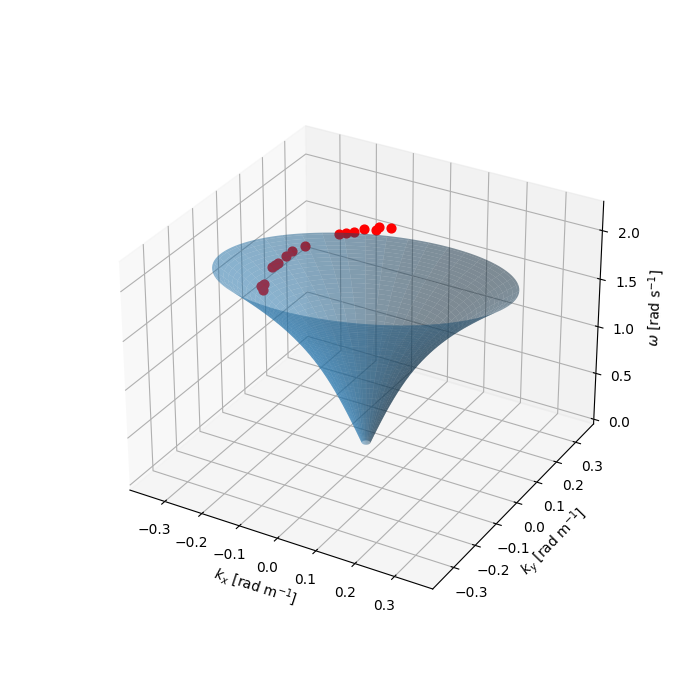

In [666]:
fig = plt.figure(figsize=(7,7))
axes = fig.add_subplot(111, projection='3d')
plotting_interface.plot_disp_shell(axes, h, z, U, psi)


j=0
for j in range(0, 16):
    axes.scatter(x1[j], y1[j], 1.7, color='red', s=40)

plt.show()

## Put it into function 

In [829]:
def plot_circle_on_dispers_rel(frequency, minval):
    f = frequency
    filtered_kx = []
    filtered_ky = []

    i = np.argmin(np.abs(spec3d.w[600//2:]-f))
    spec = spec3d.spectrum()
    spec_values = spec[600//2 + i,:,:]
    # Gives the spectrum values represented by colour
    
    # Iterate through the elements of spec_values
    for i in range(len(spec_values)):
        for j in range(len(spec_values[i])):
            if spec_values[i][j] > minval:
                filtered_kx.append(spec3d.kx[i])
                filtered_ky.append(spec3d.ky[j])

    # Convert the filtered lists to NumPy arrays if needed
    filtered_kx = np.array(filtered_kx)
    filtered_ky = np.array(filtered_ky)
    
    fig = plt.figure(figsize=(7,7))
    axes = fig.add_subplot(111, projection='3d')
    plotting_interface.plot_disp_shell(axes, h, z, U, psi)
    
    for j in range(0, len(kx_filtered)):
        axes.scatter(filtered_kx[j], filtered_ky[j], frequency, color='red', s=40)
        
    plt.show()
    
    return filtered_kx,filtered_ky, spec_values

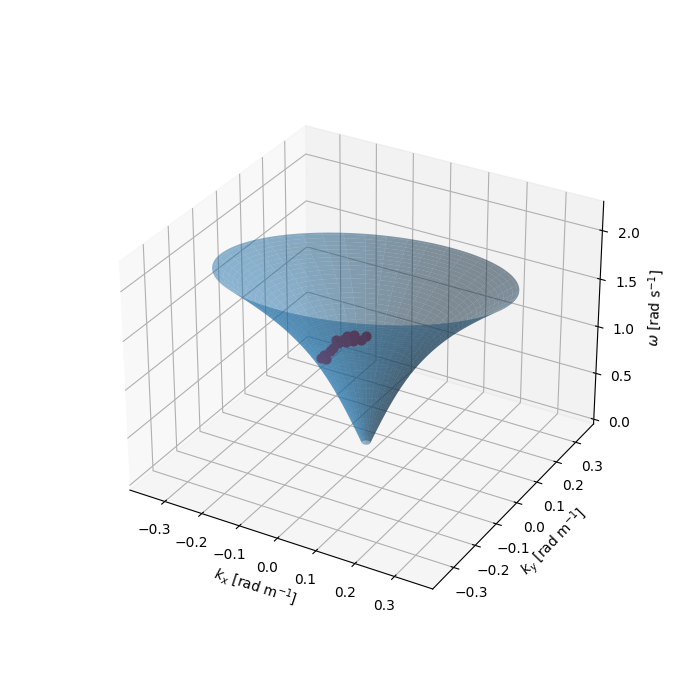

In [834]:
filtered_kx,filtered_ky, spec_values = plot_circle_on_dispers_rel(frequency = 1, minval=5)

2 2.0001473227855016 191


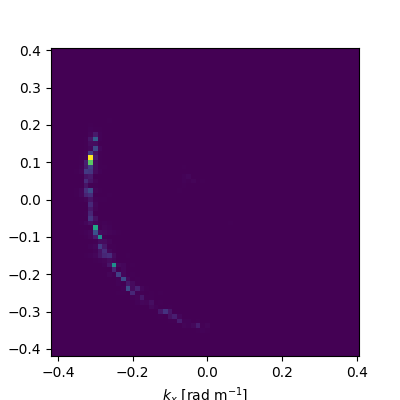

In [836]:
spec3d.plot_w_slice(2)